In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import Region

import json

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [5]:
print(time.asctime())

Tue Apr 23 06:03:45 2019


In [6]:
print(pykeen.get_version())

0.0.26-dev


Check which hyper-parameters are required by TransE:

In [7]:
Region.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'normalization_of_entities',
 'init_radius']

Define output directory:

In [2]:
TEST = False

output_directory = 'D:/uni/master/models/region_hpo/'

train_path = [
    'D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
    'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv',
    'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'
]
val_path =  [
    'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv'
]
neg_val_path = [
    'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv'
]

test_path =  [
    'D:/uni/master/data/YAGO39K/Test/triple2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Test/instanceOf2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Test/subClassOf2id_positive.tsv'
]

neg_test_path = [
    'D:/uni/master/data/YAGO39K/Test/triple2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Test/instanceOf2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Test/subClassOf2id_negative.tsv'
]


if TEST:
    output_directory = 'D:/uni/master/models/test/'
    train_path = [
        'D:/uni/master/data/debug/triple2id.tsv'
    ]
    test_path =  [
        'D:/uni/master/data/debug/triple2id_positive_test.tsv'
]

config = dict(
    training_set_path           = train_path,
    # test_set_path               = None,
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    kg_embedding_model_name     = 'Region',
    embedding_dim               = 100,
    scoring_function            = 1,  # corresponds to L1 
    normalization_of_entities   = 2,  # corresponds to L2
    init_radius                 = 1,
    reg_lambda                  = 1,
    margin_loss                 = 0,
    learning_rate               = 1,
    num_epochs                  = 1000 if not TEST else 5,  
    batch_size                  = 1024,
    test_batch_size             = 10000,
    filter_negative_triples     = True,
    preferred_device            = 'gpu'
)

Define hyper-parameters inclduing the evaluation information:
 * Define the hyper-parameter optimization mode: **HPO_mode**
 * Define for each hyper-parameter a list of values (single valued lists are possible)
 * Define the number of hyper-parameter optimization iterations: **maximum_number_of_hpo_iters**
 * Define the path to the test set (**test_set_path**) or define the ratio of the training set that should be used as test set (**test_set_ratio**)
 * Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [9]:
config = dict(
    training_set_path           = train_path,
    test_set_path               = val_path,
    neg_test_set_path           = neg_val_path,
    execution_mode              = 'HPO_mode', # Define hyper-parameter optimization mode
    random_seed                 = 2,
    kg_embedding_model_name     = 'Region',
    embedding_dim               = [10, 20, 50, 100],
    normalization_of_entities   = [1,2],  # corresponds to L2
    init_radius                 = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
    reg_lambda                  = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
    margin_loss                 = [0],
    learning_rate               = [0.1, 0.2, 0.5, 1, 2, 5, 10],
    num_epochs                  = [30],  
    batch_size                  = [1024],
    test_batch_size             = [1024],
    filter_negative_triples     = True,
    maximum_number_of_hpo_iters = 20, # Define the number HPO iterations
    preferred_device            = 'gpu'
)

Train and evaluate Region:

In [10]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

HPO Iteration:   0%|                                                   | 0/20 [00:00<?, ?it/s]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 20, 'normalization_of_entities': 1, 'init_radius': 0.05, 'reg_lambda': 0.2, 'margin_loss': 0, 'learning_rate': 10, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}



Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 10.09   val loss: 1010.70

Training epoch:   3%|█▍                                        | 1/30 [00:33<16:00, 33.12s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 18.66   val loss: 934.93

Training epoch:   7%|██▊                                       | 2/30 [01:06<15:27, 33.11s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 26.72   val loss: 1898.83

Training epoch:  10%|████▏                                     | 3/30 [01:40<15:01, 33.38s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 41.78   val loss: 2485.55

Training epoch:  13%|█████▌                                    | 4/30 [02:15<14:40, 33.88s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 57.27   val loss: 3520.35

Training epoch:  17%|███████                                   | 5/30 [02:50<14:15, 34.22s/it]INFO:pykeen.utilities.train_utils:Epoch  

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.501342957864697,), recall=(0.3893488038589401,), accuracy=(0.5006360700655641,), fscore=0.43830489818381946)


HPO Iteration:   5%|██                                      | 1/20 [04:03<1:16:59, 243.15s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 20, 'normalization_of_entities': 2, 'init_radius': 5, 'reg_lambda': 0.02, 'margin_loss': 0, 'learning_rate': 5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}




Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 15.81   val loss: 772.67


Training epoch:   3%|█▍                                        | 1/30 [00:34<16:50, 34.84s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 13.53   val loss: 688.44


Training epoch:   7%|██▊                                       | 2/30 [01:09<16:16, 34.87s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 12.21   val loss: 627.85


Training epoch:  10%|████▏                                     | 3/30 [01:44<15:39, 34.79s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 11.24   val loss: 583.34


Training epoch:  13%|█████▌                                    | 4/30 [02:19<15:04, 34.80s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 10.49   val loss: 545.66


Training epoch:  17%|███████                                   | 5/30 [02:53<14:29, 34.77s/it]INFO:pykeen.utilities.train_utils:Epoch

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5817929759704251,), recall=(0.7386089563913696,), accuracy=(0.6035163257983495,), fscore=0.6508889335669357)


HPO Iteration:  10%|████                                    | 2/20 [21:26<2:24:55, 483.11s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 10, 'reg_lambda': 0.1, 'margin_loss': 0, 'learning_rate': 2, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}




Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 343.83   val loss: 17280.34


Training epoch:   3%|█▍                                        | 1/30 [00:54<26:08, 54.08s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 309.20   val loss: 16175.31


Training epoch:   7%|██▊                                       | 2/30 [01:48<25:14, 54.09s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 295.17   val loss: 15619.56


Training epoch:  10%|████▏                                     | 3/30 [02:42<24:22, 54.17s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 286.65   val loss: 15232.95


Training epoch:  13%|█████▌                                    | 4/30 [03:36<23:28, 54.17s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 279.78   val loss: 14879.59


Training epoch:  17%|███████                                   | 5/30 [04:30<22:32, 54.12s/it]INFO:pykeen.utilities.tr

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5531279471864193,), recall=(0.6881559220389805,), accuracy=(0.5657435495971557,), fscore=0.6132977023847561)


HPO Iteration:  15%|██████                                  | 3/20 [48:32<3:54:03, 826.06s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 2, 'init_radius': 0.05, 'reg_lambda': 2, 'margin_loss': 0, 'learning_rate': 2, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}




Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 9.40   val loss: 743.38


Training epoch:   3%|█▎                                       | 1/30 [01:40<48:22, 100.09s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 15.98   val loss: 958.23


Training epoch:   7%|██▋                                      | 2/30 [03:20<46:42, 100.09s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 18.87   val loss: 1057.95


Training epoch:  10%|████                                     | 3/30 [05:00<45:02, 100.08s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 20.28   val loss: 1120.93


Training epoch:  13%|█████▍                                   | 4/30 [06:40<43:22, 100.11s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 21.24   val loss: 1162.20


Training epoch:  17%|██████▊                                  | 5/30 [08:20<41:43, 100.13s/it]INFO:pykeen.utilities.evaluation_util

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5490335970943053,), recall=(0.5517893227299394,), accuracy=(0.5489121570929967,), fscore=0.5504080106635456)


HPO Iteration:  20%|████████                                | 4/20 [58:33<3:22:17, 758.59s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 1, 'init_radius': 0.01, 'reg_lambda': 0.2, 'margin_loss': 0, 'learning_rate': 5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}





Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 5.53   val loss: 349.67



Training epoch:   3%|█▍                                        | 1/30 [01:39<48:18, 99.96s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 8.35   val loss: 565.63



Training epoch:   7%|██▊                                       | 2/30 [03:20<46:39, 99.99s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 13.37   val loss: 874.93



Training epoch:  10%|████                                     | 3/30 [05:00<45:00, 100.03s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 19.15   val loss: 1216.19



Training epoch:  13%|█████▍                                   | 4/30 [06:40<43:20, 100.02s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 26.59   val loss: 1635.39



Training epoch:  17%|██████▊                                  | 5/30 [08:20<41:40, 100.01s/it]INFO:pykeen.utilities.evaluation_

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5016332590942836,), recall=(0.8809073724007561,), accuracy=(0.5024627328179535,), fscore=0.639246943071356)


HPO Iteration:  25%|█████████▌                            | 5/20 [1:08:34<2:57:47, 711.18s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 10, 'normalization_of_entities': 2, 'init_radius': 5, 'reg_lambda': 0.2, 'margin_loss': 0, 'learning_rate': 0.5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}






Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 174.30   val loss: 8830.11




Training epoch:   3%|█▍                                        | 1/30 [00:30<14:38, 30.29s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 158.00   val loss: 8249.44




Training epoch:   7%|██▊                                       | 2/30 [01:00<14:07, 30.27s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 150.42   val loss: 7958.41




Training epoch:  10%|████▏                                     | 3/30 [01:30<13:36, 30.25s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 145.94   val loss: 7754.01




Training epoch:  13%|█████▌                                    | 4/30 [02:00<13:06, 30.23s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 142.59   val loss: 7593.65




Training epoch:  17%|███████                                   | 5/30 [02:31<12:35, 30.22s/it]INFO:pykeen.utili

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5315495958393383,), recall=(0.5529626491102275,), accuracy=(0.5324395733437715,), fscore=0.5420447284345048)


HPO Iteration:  30%|███████████▍                          | 6/20 [1:23:38<2:59:28, 769.20s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 10, 'normalization_of_entities': 2, 'init_radius': 5, 'reg_lambda': 0.5, 'margin_loss': 0, 'learning_rate': 0.5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}






Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 433.24   val loss: 21951.18




Training epoch:   3%|█▍                                        | 1/30 [00:30<14:32, 30.09s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 392.76   val loss: 20504.94




Training epoch:   7%|██▊                                       | 2/30 [01:00<14:02, 30.10s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 373.86   val loss: 19779.19




Training epoch:  10%|████▏                                     | 3/30 [01:30<13:32, 30.11s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 362.67   val loss: 19267.91




Training epoch:  13%|█████▌                                    | 4/30 [02:00<13:02, 30.09s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 354.27   val loss: 18864.39




Training epoch:  17%|███████                                   | 5/30 [02:30<12:31, 30.05s/it]INFO:pykeen.

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5329040566645202,), recall=(0.5394693957369141,), accuracy=(0.53292885800959,), fscore=0.5361666288749959)


HPO Iteration:  35%|█████████████▎                        | 7/20 [1:38:42<2:55:23, 809.53s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 10, 'normalization_of_entities': 2, 'init_radius': 1, 'reg_lambda': 1, 'margin_loss': 0, 'learning_rate': 0.1, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}






Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 35.16   val loss: 1779.42




Training epoch:   3%|█▍                                        | 1/30 [00:30<14:36, 30.23s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 32.02   val loss: 1676.39




Training epoch:   7%|██▊                                       | 2/30 [01:00<14:06, 30.23s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 30.56   val loss: 1616.28




Training epoch:  10%|████▏                                     | 3/30 [01:30<13:35, 30.21s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 29.62   val loss: 1572.33




Training epoch:  13%|█████▌                                    | 4/30 [02:00<13:06, 30.24s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 28.88   val loss: 1535.88




Training epoch:  17%|███████                                   | 5/30 [02:31<12:34, 30.20s/it]INFO:pykeen.utilities.

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5261304004025591,), recall=(0.4770875431849293,), accuracy=(0.5233062595818248,), fscore=0.500410228360454)


HPO Iteration:  40%|███████████████▏                      | 8/20 [1:53:51<2:47:52, 839.35s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 20, 'normalization_of_entities': 1, 'init_radius': 0.02, 'reg_lambda': 0.01, 'margin_loss': 0, 'learning_rate': 0.5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}






Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 1.38   val loss: 74.06




Training epoch:   3%|█▍                                        | 1/30 [00:34<16:42, 34.56s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 1.38   val loss: 73.95




Training epoch:   7%|██▊                                       | 2/30 [01:09<16:09, 34.61s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 1.38   val loss: 74.38




Training epoch:  10%|████▏                                     | 3/30 [01:44<15:35, 34.65s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 1.39   val loss: 75.46




Training epoch:  13%|█████▌                                    | 4/30 [02:18<15:01, 34.68s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 1.42   val loss: 77.50




Training epoch:  17%|███████                                   | 5/30 [02:53<14:28, 34.73s/it]INFO:pykeen.utilities.train_utils:Epo

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5407337093081691,), recall=(0.6312495925950068,), accuracy=(0.547183351273771,), fscore=0.5824962406015037)


HPO Iteration:  45%|█████████████████                     | 9/20 [1:57:54<2:01:05, 660.52s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 10, 'normalization_of_entities': 2, 'init_radius': 5, 'reg_lambda': 1, 'margin_loss': 0, 'learning_rate': 0.5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}







Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 864.83   val loss: 43820.05





Training epoch:   3%|█▍                                        | 1/30 [00:30<14:33, 30.11s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 784.02   val loss: 40932.71





Training epoch:   7%|██▊                                       | 2/30 [01:00<14:03, 30.14s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 746.30   val loss: 39481.40





Training epoch:  10%|████▏                                     | 3/30 [01:30<13:32, 30.10s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 723.89   val loss: 38456.94





Training epoch:  13%|█████▌                                    | 4/30 [02:00<13:03, 30.13s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 707.09   val loss: 37648.95





Training epoch:  17%|███████                                   | 5/30 [02:30<12:31, 30.08s/it]INFO:p

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5334186939820743,), recall=(0.5431197444755883,), accuracy=(0.5336464755194572,), fscore=0.5382255095119667)


HPO Iteration:  50%|██████████████████▌                  | 10/20 [2:12:56<2:02:10, 733.09s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 50, 'normalization_of_entities': 1, 'init_radius': 2, 'reg_lambda': 0.2, 'margin_loss': 0, 'learning_rate': 2, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}







Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 32.66   val loss: 1913.11





Training epoch:   3%|█▍                                        | 1/30 [00:54<26:10, 54.14s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 38.21   val loss: 2169.29





Training epoch:   7%|██▊                                       | 2/30 [01:48<25:14, 54.08s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 42.26   val loss: 2370.64





Training epoch:  10%|████▏                                     | 3/30 [02:42<24:19, 54.05s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 45.93   val loss: 2547.39





Training epoch:  13%|█████▌                                    | 4/30 [03:36<23:24, 54.02s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 49.48   val loss: 2763.05





Training epoch:  17%|███████                                   | 5/30 [04:30<22:30, 54.03s/it]INFO:pykeen.util

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5123152709359606,), recall=(0.8812984811941855,), accuracy=(0.5207945982972894,), fscore=0.6479595504540989)


HPO Iteration:  55%|████████████████████▎                | 11/20 [2:18:21<1:31:34, 610.50s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 20, 'normalization_of_entities': 1, 'init_radius': 0.5, 'reg_lambda': 0.5, 'margin_loss': 0, 'learning_rate': 0.1, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}








Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 6.18   val loss: 331.26






Training epoch:   3%|█▍                                        | 1/30 [00:34<16:47, 34.73s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 6.15   val loss: 330.33






Training epoch:   7%|██▊                                       | 2/30 [01:09<16:12, 34.72s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 6.14   val loss: 331.00






Training epoch:  10%|████▏                                     | 3/30 [01:44<15:37, 34.70s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 6.17   val loss: 332.93






Training epoch:  13%|█████▌                                    | 4/30 [02:18<15:01, 34.67s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 6.22   val loss: 336.27






Training epoch:  17%|███████                                   | 5/30 [02:53<14:27, 34.69s/it]INFO:pykeen.utilitie

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5293248538575192,), recall=(0.5371227429763379,), accuracy=(0.529373389437975,), fscore=0.5331952892455027)


HPO Iteration:  60%|██████████████████████▏              | 12/20 [2:22:24<1:06:41, 500.24s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 1, 'init_radius': 5, 'reg_lambda': 0.5, 'margin_loss': 0, 'learning_rate': 0.1, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}









Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 486.89   val loss: 26172.52







Training epoch:   3%|█▍                                        | 1/30 [01:39<48:16, 99.88s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 486.48   val loss: 26178.56







Training epoch:   7%|██▊                                       | 2/30 [03:19<46:36, 99.88s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 486.86   val loss: 26211.44







Training epoch:  10%|████▏                                     | 3/30 [04:59<44:57, 99.91s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 487.65   val loss: 26263.29







Training epoch:  13%|█████▌                                    | 4/30 [06:39<43:18, 99.92s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 488.76   val loss: 26330.58







Training epoch:  17%|███████                                   | 5/30 [08:19<41:37, 99.9

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5443978043267679,), recall=(0.6594094257219216,), accuracy=(0.5534135760185276,), fscore=0.596409515667836)


HPO Iteration:  65%|████████████████████████             | 13/20 [2:32:24<1:01:51, 530.18s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 0.1, 'reg_lambda': 0.5, 'margin_loss': 0, 'learning_rate': 0.1, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}










Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 1.95   val loss: 115.20








Training epoch:   3%|█▍                                        | 1/30 [00:54<26:10, 54.14s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 2.25   val loss: 126.71








Training epoch:   7%|██▊                                       | 2/30 [01:48<25:16, 54.18s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 2.44   val loss: 134.89








Training epoch:  10%|████▏                                     | 3/30 [02:42<24:22, 54.18s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 2.57   val loss: 141.32








Training epoch:  13%|█████▌                                    | 4/30 [03:36<23:29, 54.22s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 2.68   val loss: 147.01








Training epoch:  17%|███████                                   | 5/30 [04:31<22:36, 54.24s/it]INFO:pyk

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.525968373712462,), recall=(0.4726549768593964,), accuracy=(0.5229474508268911,), fscore=0.4978885570089608)


HPO Iteration:  70%|███████████████████████████▎           | 14/20 [2:37:50<46:53, 468.85s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 2, 'init_radius': 0.1, 'reg_lambda': 0.5, 'margin_loss': 0, 'learning_rate': 1, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}











Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 2.78   val loss: 183.52









Training epoch:   3%|█▎                                       | 1/30 [01:40<48:23, 100.12s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 3.84   val loss: 228.03









Training epoch:   7%|██▋                                      | 2/30 [03:20<46:42, 100.10s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 4.56   val loss: 260.56









Training epoch:  10%|████                                     | 3/30 [05:00<45:02, 100.11s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 5.05   val loss: 281.74









Training epoch:  13%|█████▍                                   | 4/30 [06:40<43:22, 100.09s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 5.36   val loss: 295.58









Training epoch:  17%|██████▊                                  | 5/30 [08:20<41:42, 100.11s/it]IN

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5404060777195105,), recall=(0.523955413597549,), accuracy=(0.5388002739994129,), fscore=0.5320536157537646)


HPO Iteration:  75%|█████████████████████████████▎         | 15/20 [2:47:51<42:22, 508.55s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 0.5, 'reg_lambda': 10, 'margin_loss': 0, 'learning_rate': 1, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}












Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 78.97   val loss: 4230.63










Training epoch:   3%|█▍                                        | 1/30 [00:54<26:16, 54.38s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 80.92   val loss: 4543.70










Training epoch:   7%|██▊                                       | 2/30 [01:48<25:21, 54.35s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 88.08   val loss: 4905.16










Training epoch:  10%|████▏                                     | 3/30 [02:42<24:26, 54.31s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 94.12   val loss: 5214.74










Training epoch:  13%|█████▌                                    | 4/30 [03:37<23:32, 54.31s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 97.89   val loss: 5287.03










Training epoch:  17%|███████                                   | 5/30 [04:31<22:

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5333687143425766,), recall=(0.5240857831953588,), accuracy=(0.5324069543660501,), fscore=0.5286865033700476)


HPO Iteration:  80%|███████████████████████████████▏       | 16/20 [2:53:17<30:15, 453.84s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 2, 'init_radius': 1, 'reg_lambda': 0.2, 'margin_loss': 0, 'learning_rate': 0.1, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}













Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 8.18   val loss: 416.13











Training epoch:   3%|█▎                                       | 1/30 [01:40<48:22, 100.09s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 7.53   val loss: 396.35











Training epoch:   7%|██▋                                      | 2/30 [03:20<46:42, 100.08s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 7.26   val loss: 385.99











Training epoch:  10%|████                                     | 3/30 [05:00<45:01, 100.07s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 7.10   val loss: 378.78











Training epoch:  13%|█████▍                                   | 4/30 [06:40<43:21, 100.07s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 6.98   val loss: 372.93











Training epoch:  17%|██████▊                                  | 5/30 [08:20<41:41, 1

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5349278930707,), recall=(0.49566521087282445,), accuracy=(0.531982907655674,), fscore=0.5145486534037081)


HPO Iteration:  85%|██████████████████████████████▌     | 17/20 [3:43:20<1:00:55, 1218.56s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 2, 'init_radius': 0.2, 'reg_lambda': 10, 'margin_loss': 0, 'learning_rate': 0.1, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}













Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 20.08   val loss: 1231.73











Training epoch:   3%|█▎                                       | 1/30 [01:40<48:22, 100.09s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 24.79   val loss: 1431.60











Training epoch:   7%|██▋                                      | 2/30 [03:20<46:42, 100.08s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 28.13   val loss: 1585.31











Training epoch:  10%|████                                     | 3/30 [05:00<45:02, 100.08s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 30.65   val loss: 1709.38











Training epoch:  13%|█████▍                                   | 4/30 [06:40<43:22, 100.08s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 32.77   val loss: 1814.86











Training epoch:  17%|██████▊                                  | 5/30 [08:2

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5279092479903839,), recall=(0.4580535819046998,), accuracy=(0.5238281632253645,), fscore=0.49050677090604494)


HPO Iteration:  90%|██████████████████████████████████▏   | 18/20 [3:53:21<34:26, 1033.31s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 1, 'init_radius': 0.2, 'reg_lambda': 0.01, 'margin_loss': 0, 'learning_rate': 0.5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}














Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 1.40   val loss: 75.18












Training epoch:   3%|█▎                                       | 1/30 [01:40<48:20, 100.03s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 1.41   val loss: 76.60












Training epoch:   7%|██▋                                      | 2/30 [03:20<46:40, 100.02s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 1.46   val loss: 80.69












Training epoch:  10%|████                                     | 3/30 [05:00<45:00, 100.02s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 1.56   val loss: 87.90












Training epoch:  13%|█████▍                                   | 4/30 [06:40<43:20, 100.01s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 1.67   val loss: 91.50












Training epoch:  17%|██████▊                                  | 5/30 [08:20<41:40, 

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5285429356907984,), recall=(0.6391369532624992,), accuracy=(0.5341357601852758,), fscore=0.5786026200873362)


HPO Iteration:  95%|█████████████████████████████████████  | 19/20 [4:03:22<15:03, 903.48s/it]

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 2, 'init_radius': 0.5, 'reg_lambda': 0.2, 'margin_loss': 0, 'learning_rate': 5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}















Training epoch:   0%|                                                  | 0/30 [00:00<?, ?it/s]INFO:pykeen.utilities.train_utils:Epoch  0:   loss: 3.21   val loss: 184.82













Training epoch:   3%|█▎                                       | 1/30 [01:40<48:22, 100.08s/it]INFO:pykeen.utilities.train_utils:Epoch  1:   loss: 3.37   val loss: 183.21













Training epoch:   7%|██▋                                      | 2/30 [03:20<46:41, 100.04s/it]INFO:pykeen.utilities.train_utils:Epoch  2:   loss: 3.39   val loss: 183.28













Training epoch:  10%|████                                     | 3/30 [05:00<45:01, 100.04s/it]INFO:pykeen.utilities.train_utils:Epoch  3:   loss: 3.37   val loss: 179.82













Training epoch:  13%|█████▍                                   | 4/30 [06:40<43:20, 100.04s/it]INFO:pykeen.utilities.train_utils:Epoch  4:   loss: 3.32   val loss: 176.14













Training epoch:  17%|██████▊                                  | 5/30 [08

MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5531790499390986,), recall=(0.7401082067661822,), accuracy=(0.5707994911439476,), fscore=0.6331344448781575)


HPO Iteration: 100%|██████████████████████████████████████| 20/20 [4:36:43<00:00, 1232.99s/it]

Check result entries:

In [11]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration'])

In [ ]:
results = {
    'losses': json.load(open(os.path.join(output_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(output_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(output_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(output_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(output_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(output_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(output_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(output_directory, 'relation_to_id.json')))
}

In [10]:
import torch, os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
# Initialize KG embedding model
config = results['final_configuration']
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(output_directory, 'trained_model.pkl')))

results['trained_model'] = model 

Get the model configuration that lead to best results:

In [11]:
results['final_configuration']

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv',
 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv',
 'execution_mode': 'HPO_mode',
 'random_seed': 2,
 'kg_embedding_model_name': 'Region',
 'embedding_dim': 20,
 'normalization_of_entities': 2,
 'init_radius': 5,
 'reg_lambda': 0.02,
 'margin_loss': 0,
 'learning_rate': 5,
 'num_epochs': 30,
 'batch_size': 1024,
 'test_batch_size': 1024,
 'filter_negative_triples': True,
 'maximum_number_of_hpo_iters': 20,
 'preferred_device': 'gpu',
 'pykeen-version': '0.0.26-dev',
 'num_entities': 46100,
 'num_relations': 39}

Access trained model:

In [12]:
results['trained_model']

Region(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(46100, 20)
  (relation_embeddings): Embedding(39, 20)
  (relation_regions): Embedding(39, 1)
)

Visualize loss values:

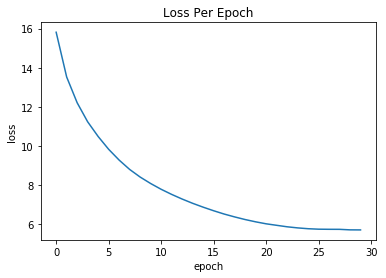

In [13]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

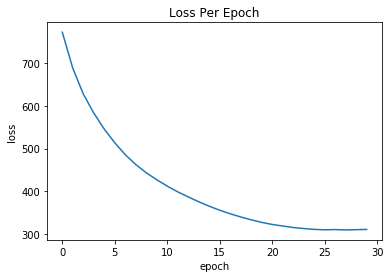

In [14]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [15]:
losses

[772.6699759411493,
 688.4413755617142,
 627.8540225649516,
 583.344944241333,
 545.6641978698094,
 513.6422348978679,
 485.65485295708976,
 462.65145452200574,
 443.37565226256055,
 426.89065475819905,
 412.0385928973516,
 398.5981336243312,
 386.6468931501706,
 375.3785730852763,
 364.9676912009875,
 355.4873238780975,
 347.2051489072482,
 339.70292988033293,
 333.06249969336193,
 327.0346826666514,
 322.1642740907669,
 318.5326022102674,
 314.99964511264164,
 312.60302341950734,
 310.5579859805425,
 309.70189576644896,
 310.1266055498441,
 309.3737746005376,
 309.9457740099907,
 310.5135847127279]

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [16]:
results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': [0.5817929759704251],
 'recall': [0.7386089563913696],
 'accuracy': [0.6035163257983495],
 'f1_score': 0.6508889335669357}

1.

    {'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
     'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv',
     'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv',
     'execution_mode': 'HPO_mode',
     'random_seed': 2,
     'kg_embedding_model_name': 'Region',
     'embedding_dim': 20,
     'normalization_of_entities': 2,
     'init_radius': 5,
     'reg_lambda': 0.02,
     'margin_loss': 0,
     'learning_rate': 5,
     'num_epochs': 30,
     'batch_size': 1024,
     'test_batch_size': 1024,
     'filter_negative_triples': True,
     'maximum_number_of_hpo_iters': 20,
     'preferred_device': 'gpu',
     'pykeen-version': '0.0.26-dev',
     'num_entities': 46100,
     'num_relations': 39}


     {'mean_rank': None,
     'hits@k': None,
     'precision': [0.5817929759704251],
     'recall': [0.7386089563913696],
     'accuracy': [0.6035163257983495],
     'f1_score': 0.6508889335669357}

     30 epochs overfit

2.
   
       {'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 2, 'init_radius': 0.5, 'reg_lambda': 0.2, 'margin_loss': 0, 'learning_rate': 5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}

    MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5531790499390986,), recall=(0.7401082067661822,), accuracy=(0.5707994911439476,), fscore=0.6331344448781575)

    18 epochs


3.

    {'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 10, 'reg_lambda': 0.1, 'margin_loss': 0, 'learning_rate': 2, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}

    MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5531279471864193,), recall=(0.6881559220389805,), accuracy=(0.5657435495971557,), fscore=0.6132977023847561)

    30 epochs not finished

